<a href="https://colab.research.google.com/github/Zenith40/Demo-Code/blob/main/Rice_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Importing from Kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 99% 217M/219M [00:12<00:00, 23.6MB/s]
100% 219M/219M [00:12<00:00, 18.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rice-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
!pip install split-folders

In [8]:
import splitfolders

input_folder = '/content/Rice_Image_Dataset'
output_folder = "/content/dataset"

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))

Copying files: 75000 files [00:09, 7667.70 files/s]


In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/val',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 60000 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.


In [10]:
# Normalize

def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,453 (56.64 MB)

 Trainable params: 14,848,005 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 155s 76ms/step - accuracy: 0.8751 - loss: 1.0082 - val_accuracy: 0.9264 - val_loss: 0.3007
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 191s 75ms/step - accuracy: 0.9783 - loss: 0.0820 - val_accuracy: 0.9481 - val_loss: 0.1678
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.9804 - loss: 0.0765 - val_accuracy: 0.9938 - val_loss: 0.0242
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9834 - loss: 0.0599 - val_accuracy: 0.9809 - val_loss: 0.0579
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9871 - loss: 0.0507 - val_accuracy: 0.9043 - val_loss: 0.4469
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 71ms/step - accuracy: 0.9896 - loss: 0.0413 - val_accuracy: 0.9937 - val_loss: 0.0280
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 149s 75ms/step - accuracy: 0.9911 - loss: 0.0331 - val_accuracy: 0.9944 - val_loss: 0.0233
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 

In [15]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(history, file)

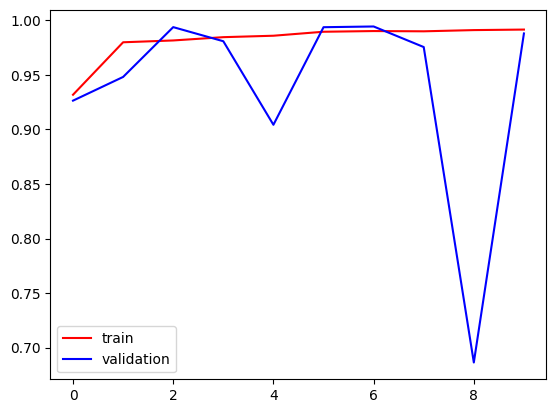

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

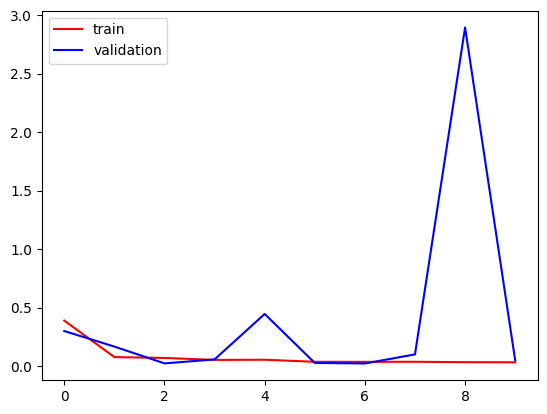

In [17]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [246]:
test_img = cv2.imread('/content/dataset/val/Basmati/basmati (10202).jpg')

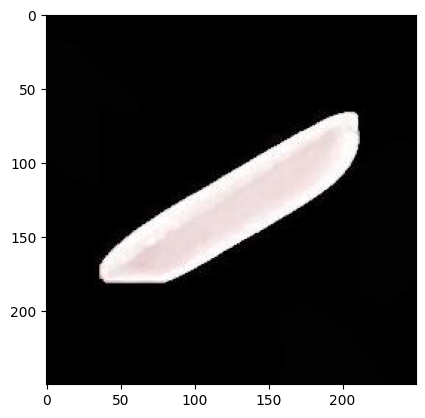

In [247]:
plt.imshow(test_img)

In [248]:
test_img.shape

(250, 250, 3)

In [249]:
test_img = cv2.resize(test_img, (256,256))

In [250]:
test_input = test_img.reshape((1,256,256,3))

In [251]:
x=model.predict(test_input)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [252]:
import numpy as np

In [253]:
y = np.where(x==1)[0][0]

In [254]:
x

array([0., 1., 0., 0., 0.], dtype=float32)

In [255]:
if(y==0):
  print('Arborio')
elif(y==1):
  print('Basmati')
elif(y==2):
  print('Ipsala')
elif(y==3):
  print('Jasmine')
else:
  print('Karacadag')

Basmati
